<a href="https://colab.research.google.com/github/guimCC/Novartis_Datathon_2023/blob/main/datathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip -q install pandas pyarrow

In [ ]:
import pandas as pd

df_train = pd.read_parquet('train_data.parquet')
df_train = df_train[['brand', 'country', 'date', 'phase']]

df_train.head()


,brand,country,date,phase
0,AIMST,Aldovia,2013-01-02,0.006284
1,AIMST,Aldovia,2013-01-03,0.123459
2,AIMST,Aldovia,2013-01-04,0.055607
3,AIMST,Aldovia,2013-01-07,0.032148
4,AIMST,Aldovia,2013-01-08,0.097054


In [ ]:
import pandas as pd
import numpy as np

df_train = pd.read_parquet('train_data.parquet')

df_train = df_train[['brand', 'country', 'date', 'phase']]
df_train['date'] = pd.to_datetime(df_train['date'])
#df_train['month'] = df_train['date'].dt.to_period('M')
#df_train = df_train.groupby(['brand', 'country', 'month'], as_index=False).sum(numeric_only=True)
print(np.unique(df_train['phase']))

# create datetime columns
df_train['year'] = df_train['date'].dt.year
df_train['month'] = df_train['date'].dt.month
df_train['quarter'] = df_train['date'].dt.quarter


df_train.groupby(['year', 'month', 'brand', 'country'])['phase'].transform(sum)


def check_sum(df_train):
  df_train['date'] = pd.to_datetime(df_train['date'])
  #df_train['month'] = df_train['date'].dt.to_period('M')
  #df_train = df_train.groupby(['brand', 'country', 'month'], as_index=False).sum(numeric_only=True)

  # create datetime columns
  df_train['year'] = df_train['date'].dt.year
  df_train['month'] = df_train['date'].dt.month
  df_train['quarter'] = df_train['date'].dt.quarter


  return df_train.groupby(['year', 'month', 'brand', 'country'])['phase'].transform(sum)

np.min(check_sum(df_train))


[0.00000000e+00 2.71050543e-20 3.23903323e-10 ... 8.65897701e-01
 8.66437427e-01 9.20948454e-01]


0.9999999999999996

Sum of phase per Month:
[1. 1. 1. 1. 1. 1. 1.]


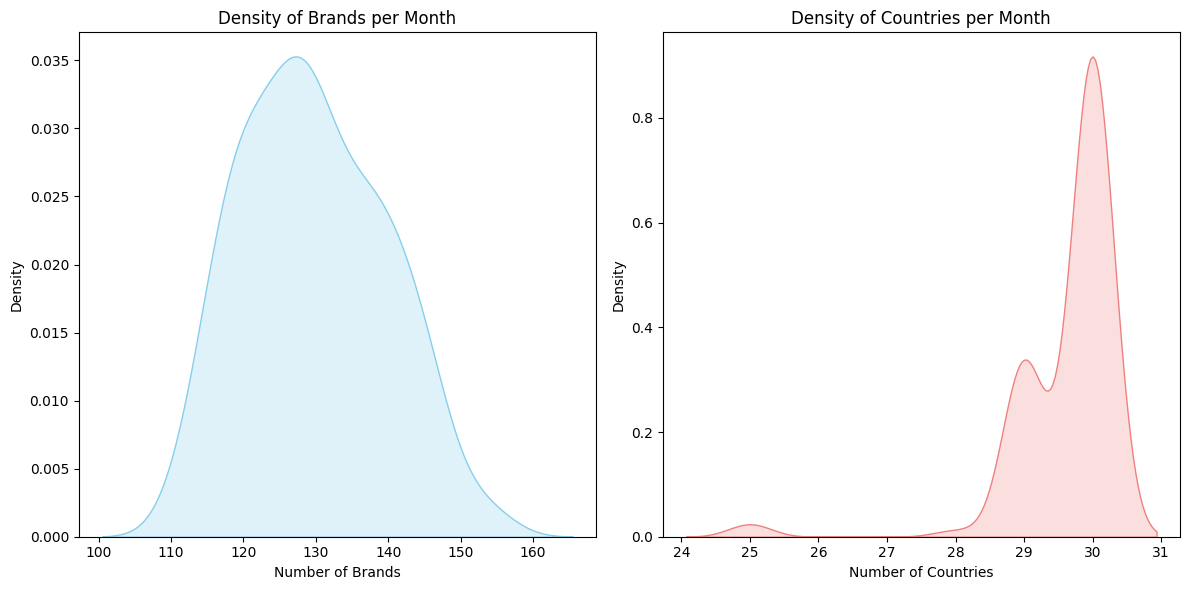

In [ ]:
import seaborn as sns

df_train = pd.read_parquet('train_data.parquet')
df_train = df_train[['brand', 'country', 'date', 'phase']]
df_train['date'] = pd.to_datetime(df_train['date'])
df_train['month'] = df_train['date'].dt.to_period('M')
df_train = df_train.groupby(['brand', 'country', 'month'], as_index=False).sum(numeric_only=True)

print("Sum of phase per Month:")
print(np.unique(df_train['phase']))

brands_per_month = df_train.groupby('month')['brand'].nunique()
countries_per_month = df_train.groupby('month')['country'].nunique()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.kdeplot(brands_per_month, fill=True, color='skyblue')
plt.title('Density of Brands per Month')
plt.xlabel('Number of Brands')
plt.ylabel('Density')

# Plot density of countries per month
plt.subplot(1, 2, 2)
sns.kdeplot(countries_per_month, fill=True, color='lightcoral')
plt.title('Density of Countries per Month')
plt.xlabel('Number of Countries')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
print('brands: ', len(np.unique(df_train['brand'])))
print('countries: ',len(np.unique(df_train['country'])))
# petit problema

brands:  258
countries:  30


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def multiply_cols(df, name_list):
    for i in range(len(name_list)):
        for j in range(i + 1, len(name_list)):
            col1 = name_list[i]
            col2 = name_list[j]
            df[f'{col1}{col2}'] = df[col1] * df[col2]
    return df


def getXy():
    df_train = pd.read_parquet('train_data.parquet')
    df_train = df_train[['brand', 'country', 'date', 'phase']]
    df_train['date'] = pd.to_datetime(df_train['date'])
    df_train.sort_values(by=['brand', 'country', 'date'], inplace=True)
    df_train.set_index(['brand', 'country', 'date'], inplace=True)
    df_train['phase_lag1'] = df_train.groupby(['brand', 'country'])['phase'].shift(1)
    df_train['phase_lag2'] = df_train.groupby(['brand', 'country'])['phase'].shift(2)
    df_train['phase_lag3'] = df_train.groupby(['brand', 'country'])['phase'].shift(3)
    df_train['phase_lag4'] = df_train.groupby(['brand', 'country'])['phase'].shift(4)
    df_train['phase_lag5'] = df_train.groupby(['brand', 'country'])['phase'].shift(5)
    df_train['phase_lag6'] = df_train.groupby(['brand', 'country'])['phase'].shift(6)
    df_train['phase_lag7'] = df_train.groupby(['brand', 'country'])['phase'].shift(7)
    df_train[f'rolling_mean_3'] = df_train.groupby(['brand', 'country'])['phase'].transform(lambda x: x.rolling(window=3).mean())
    df_train[f'rolling_std_3'] = df_train.groupby(['brand', 'country'])['phase'].transform(lambda x: x.rolling(window=3).mean())
    df_train[f'rolling_mean_5'] = df_train.groupby(['brand', 'country'])['phase'].transform(lambda x: x.rolling(window=5).mean())
    df_train[f'rolling_std_5'] = df_train.groupby(['brand', 'country'])['phase'].transform(lambda x: x.rolling(window=5).mean())
    df_train[f'rolling_mean_8'] = df_train.groupby(['brand', 'country'])['phase'].transform(lambda x: x.rolling(window=8).mean())
    df_train[f'rolling_std_8'] = df_train.groupby(['brand', 'country'])['phase'].transform(lambda x: x.rolling(window=8).mean())

    name_list = ['phase_lag1', 'phase_lag2', 'phase_lag3', 'phase_lag4', 'phase_lag5', 'phase_lag6', 'phase_lag7',
                 'rolling_mean_3', 'rolling_mean_5', 'rolling_mean_8', 'rolling_std_3', 'rolling_std_5', 'rolling_std_8']
    df_train = multiply_cols(df_train, name_list)

    df_train = multiply_cols(df_train, name_list)

    X = df_train.drop('phase', axis=1)
    y = df_train['phase']
    return X, y

def splitXy():
    X, y = getXy()
    candidate_years = np.arange(2013, 2022)

    # Extract the year from the date index
    years = X.index.get_level_values(2).year

    # Randomly select 2 years for the test set
    test_years = np.random.choice(candidate_years, size=2, replace=False)

    # Create a mask for the training set
    train_mask = ~years.isin(test_years)

    # Split the data into training and test sets based on the selected years
    X_train, y_train = X[train_mask], y[train_mask]
    X_test, y_test = X[~train_mask], y[~train_mask]

    return X_train, X_test, y_train, y_test


def get_df_pred(y_test, y_pred, X_test):
    df_train = pd.read_parquet('train_data.parquet')
    X_test = X_test.merge(df_train, left_index=True, right_index=True, how='inner')

    df_val_predictions = pd.DataFrame({'phase': y_test, 'prediction': y_pred, 'monthly': df_train['monthly'], 'date': X_test['date'], 'brand': X_test['brand'], 'country': X_test['country']})
    return df_val_predictions

def metric(df: pd.DataFrame) -> float:
    """Compute performance metric.

    :param df: Dataframe with target ('phase') and 'prediction', and identifiers.
    :return: Performance metric
    """
    df = df.copy()
    assert 'monthly' in df.columns, "Missing 'monthly' column, only available in the train set"
    assert 'phase' in df.columns, "Missing 'phase' column, only available in the train set"
    assert 'prediction' in df.columns, "Missing 'prediction' column with predictions"

    df["date"] = pd.to_datetime(df["date"])

    # create datetime columns
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['quarter'] = df['date'].dt.quarter

    # Sum of phasing country-brand-month = 1
    df['sum_pred'] = df.groupby(['year', 'month', 'brand', 'country'])['prediction'].transform(sum)
    assert np.isclose(df['sum_pred'], 1.0, rtol=1e-04).all(), "Condition phasing year-month-brand-country must sum 1 is not fulfilled"
    # define quarter weights
    df['quarter_w'] = np.where(df['quarter'] == 1, 1,
                    np.where(df['quarter'] == 2, 0.75,
                    np.where(df['quarter'] == 3, 0.66, 0.5)))

    # compute and return metric
    return round(np.sqrt((1 / len(df)) * sum(((df['phase'] - df['prediction'])**2) * df['quarter_w'] * df['monthly'])), 8)



X_train, X_test, y_train, y_test = splitXy()
X_train

phase_lag1  phase_lag2  phase_lag3  phase_lag4  \
brand country date                                                         
ABRRE Arrakis 2013-01-02         NaN         NaN         NaN         NaN   
              2013-01-03    0.027525         NaN         NaN         NaN   
              2013-01-04    0.012902    0.027525         NaN         NaN   
              2013-01-07    0.008602    0.012902    0.027525         NaN   
              2013-01-08    0.013807    0.008602    0.012902    0.027525   
...                              ...         ...         ...         ...   
ZVLFE Zamunda 2016-09-26    0.007321    0.101771    0.043872    0.002369   
              2016-09-27    0.010716    0.007321    0.101771    0.043872   
              2016-09-28    0.042210    0.010716    0.007321    0.101771   
              2016-09-29    0.051639    0.042210    0.010716    0.007321   
              2016-09-30    0.065464    0.051639    0.042210    0.010716   

                          phase_lag5  phase_lag6  phase_lag7  rolling_mean_3  \
brand country date                                                             
ABRRE Arrakis 2013-01-02         NaN         NaN         NaN             NaN   
              2013-01-03         NaN         NaN         NaN             NaN   
              2013-01-04         NaN         NaN         NaN        0.016343   
              2013-01-07         NaN         NaN         NaN        0.011770   
              2013-01-08         NaN         NaN         NaN        0.007469   
...                              ...         ...         ...             ...   
ZVLFE Zamunda 2016-09-26    0.108942    0.103674    0.024222        0.039936   
              2016-09-27    0.002369    0.108942    0.103674        0.020082   
              2016-09-28    0.043872    0.002369    0.108942        0.034855   
              2016-09-29    0.101771    0.043872    0.002369        0.053104   
              2016-09-30    0.007321    0.101771    0.043872        0.039034   

                          rolling_std_3  rolling_mean_5  ...  \
brand country date                                       ...   
ABRRE Arrakis 2013-01-02            NaN             NaN  ...   
              2013-01-03            NaN             NaN  ...   
              2013-01-04       0.016343             NaN  ...   
              2013-01-07       0.011770             NaN  ...   
              2013-01-08       0.007469        0.012567  ...   
...                                 ...             ...  ...   
ZVLFE Zamunda 2016-09-26       0.039936        0.033210  ...   
              2016-09-27       0.020082        0.041178  ...   
              2016-09-28       0.034855        0.042731  ...   
              2016-09-29       0.053104        0.035470  ...   
              2016-09-30       0.039034        0.034006  ...   

                          rolling_mean_5rolling_mean_8  \
brand country date                                       
ABRRE Arrakis 2013-01-02                           NaN   
              2013-01-03                           NaN   
              2013-01-04                           NaN   
              2013-01-07                           NaN   
              2013-01-08                           NaN   
...                                                ...   
ZVLFE Zamunda 2016-09-26                      0.001672   
              2016-09-27                      0.002166   
              2016-09-28                      0.001970   
              2016-09-29                      0.001443   
              2016-09-30                      0.001373   

                          rolling_mean_5rolling_std_3  \
brand country date                                      
ABRRE Arrakis 2013-01-02                          NaN   
              2013-01-03                          NaN   
              2013-01-04                          NaN   
              2013-01-07                          NaN   
              2013-01-08                     0.000094   
...      

In [ ]:
len(np.unique(X_train.index.get_level_values(2).year))
len(np.unique(X_test.index.get_level_values(2).year))
X_test.shape

(610768, 5)

In [ ]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = splitXy()

train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# Train the LightGBM model
num_round = 100
bst = lgb.train(params, train_data, num_boost_round=num_round, valid_sets=[test_data])

# Find the best iteration based on the minimum validation loss
best_iteration = bst.best_iteration

# Make predictions on the test set
y_pred = bst.predict(X_test, num_iteration=best_iteration)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 3.952024 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23205
[LightGBM] [Info] Number of data points in the train set: 2193941, number of used features: 91
[LightGBM] [Info] Start training from score 0.048593


In [ ]:
def get_monthly(X_test):
    df_train = pd.read_parquet('train_data.parquet')
    df_train.set_index(['brand', 'country', 'date'], inplace=True)
    X_test = X_test.merge(df_train, left_index=True, right_index=True)
    return X_test['monthly']
monthly = get_monthly(X_test)
brand = X_test.index.get_level_values(0)
country = X_test.index.get_level_values(1)
date = X_test.index.get_level_values(2)

In [ ]:
date.shape

(639331,)

In [ ]:
df_val_predictions = pd.DataFrame({
    'phase': y_test,
    'prediction': y_pred,
    'monthly': monthly,
    'date': date,
    'brand': brand,
    'country': country
})

df_val_predictions.reset_index(inplace=True, drop = True)
#sums = check_sum(df_val_predictions)
#np.min(sums)
metric_score = metric(df_val_predictions)
print(f'Mean Squared Error: {metric_score}')

AssertionError: ignored

In [ ]:
def check_sum(df_train):
  df_train['date'] = pd.to_datetime(df_train['date'])
  #df_train['month'] = df_train['date'].dt.to_period('M')
  #df_train = df_train.groupby(['brand', 'country', 'month'], as_index=False).sum(numeric_only=True)

  # create datetime columns
  df_train['year'] = df_train['date'].dt.year
  df_train['month'] = df_train['date'].dt.month
  df_train['quarter'] = df_train['date'].dt.quarter
  return df_train.groupby(['year', 'month', 'brand', 'country'])['prediction'].transform(sum)

np.min(check_sum(df_val_predictions))



0.6417069788483623

In [ ]:
X_test

,,,phase_lag1,phase_lag2,phase_lag3,phase_lag4,phase_lag5
brand,country,date,,,,,
AIMST,Dorne,2014-01-01,0.000000,0.003122,0.033177,0.036226,0.144904
DKCQN,Dorne,2014-01-01,0.638203,0.041042,0.035597,0.020358,0.027719
DKNSS,Dorne,2014-01-01,0.446569,0.011648,0.074595,0.011634,0.019129
EAHGQ,Dorne,2014-01-01,0.530185,0.022914,0.105630,0.000000,0.000000
EUJWP,Dorne,2014-01-01,0.553364,0.015383,0.018348,0.012505,0.031940
GIKKL,Dorne,2014-01-01,0.589618,0.122188,0.006221,0.035328,0.018807
GUCEF,Dorne,2014-01-01,0.341807,0.000000,0.044992,0.020599,0.032014
HGSMA,Dorne,2014-01-01,0.368417,0.124975,0.027307,0.049903,0.000000
HHBXR,Dorne,2014-01-01,0.496678,0.011293,0.044932,0.011233,0.056165


In [ ]:
def metric(df: pd.DataFrame) -> float:
    """Compute performance metric.

    :param df: Dataframe with target ('phase') and 'prediction', and identifiers.
    :return: Performance metric
    """
    df = df.copy()
    assert 'monthly' in df.columns, "Missing 'monthly' column, only available in the train set"
    assert 'phase' in df.columns, "Missing 'phase' column, only available in the train set"
    assert 'prediction' in df.columns, "Missing 'prediction' column with predictions"

    df["date"] = pd.to_datetime(df["date"])

    # create datetime columns
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['quarter'] = df['date'].dt.quarter

    # Sum of phasing country-brand-month = 1
    df['sum_pred'] = df.groupby(['year', 'month', 'brand', 'country'])['prediction'].transform(sum)
    #assert np.isclose(df['sum_pred'], 1.0, rtol=1e-04).all(), "Condition phasing year-month-brand-country must sum 1 is not fulfilled"

    # define quarter weights
    df['quarter_w'] = np.where(df['quarter'] == 1, 1,
                    np.where(df['quarter'] == 2, 0.75,
                    np.where(df['quarter'] == 3, 0.66, 0.5)))

    # compute and return metric
    return round(np.sqrt((1 / len(df)) * sum(((df['phase'] - df['prediction'])**2) * df['quarter_w'] * df['monthly'])), 8)


df_train = pd.read_parquet('train_data.parquet')
df_train = df_train[df_train['date'].dt.year.isin([2021])]

df_val_predictions = pd.DataFrame({'phase': y_test, 'prediction': y_pred, 'monthly': df_train['monthly'], 'date': X_test['date'], 'brand': X_test['brand'], 'country': X_test['country']})

# Use the metric function to compute the performance metric
performance_metric = metric(df_val_predictions)




In [ ]:
df_train = pd.read_parquet('train_data.parquet')
df_train = df_train[['brand', 'country', 'date', 'phase']]
df_train['date'] = pd.to_datetime(df_train['date'])
df_train['month'] = df_train['date'].dt.to_period('M')

import matplotlib.pyplot as plt

selected_brand = 'AIMST'
selected_month = '2021-02'

#filtered_data = df_train[(df_train['brand'] == selected_brand) & (df_train['date'].dt.to_period('M') == selected_month)]
filtered_data = df_train[df_train['date'].dt.to_period('M') == selected_month]


def plot_phase():
    plt.figure(figsize=(10, 6))
    for country, country_data in filtered_data.groupby('country'):
        plt.plot(country_data['date'], country_data['phase'], label=country)

    plt.title(f'Phase for Brand {selected_brand} in {selected_month}')
    plt.xlabel('Date')
    plt.ylabel('Phase')
    plt.legend()
    plt.show()


len(np.unique(filtered_data['country']))

<ipython-input-53-80909839ec0e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['date'] = pd.to_datetime(df_train['date'])


29

In [ ]:
def metric(df: pd.DataFrame) -> float:
    """Compute performance metric.

    :param df: Dataframe with target ('phase') and 'prediction', and identifiers.
    :return: Performance metric
    """
    df = df.copy()
    assert 'monthly' in df.columns, "Missing 'monthly' column, only available in the train set"
    assert 'phase' in df.columns, "Missing 'phase' column, only available in the train set"
    assert 'prediction' in df.columns, "Missing 'prediction' column with predictions"

    df["date"] = pd.to_datetime(df["date"])

    # create datetime columns
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['quarter'] = df['date'].dt.quarter

    # Sum of phasing country-brand-month = 1
    df['sum_pred'] = df.groupby(['year', 'month', 'brand', 'country'])['prediction'].transform(sum)
    #assert np.isclose(df['sum_pred'], 1.0, rtol=1e-04).all(), "Condition phasing year-month-brand-country must sum 1 is not fulfilled"

    # define quarter weights
    df['quarter_w'] = np.where(df['quarter'] == 1, 1,
                    np.where(df['quarter'] == 2, 0.75,
                    np.where(df['quarter'] == 3, 0.66, 0.5)))

    # compute and return metric
    return round(np.sqrt((1 / len(df)) * sum(((df['phase'] - df['prediction'])**2) * df['quarter_w'] * df['monthly'])), 8)


In [ ]:
import category_encoders as ce
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor


# Load the data
df_train = pd.read_parquet('train_data.parquet')
df_test = pd.read_parquet('submission_data.parquet')

# Select columns of interest and convert 'date' to datetime
df_train = df_train[['country', 'brand', 'date', 'phase']]
df_train['date'] = pd.to_datetime(df_train['date'])

# https://stackoverflow.com/questions/68441559/how-to-convert-dtype-datetime64ns-to-float/71259141#71259141
def dt64_to_float(dt64):
    year = dt64.astype('M8[Y]')
    days = (dt64 - year).astype('timedelta64[D]')
    year_next = year + np.timedelta64(1, 'Y')
    days_of_year = (year_next.astype('M8[D]') - year.astype('M8[D]')).astype('timedelta64[D]')
    dt_float = 1970 + year.astype(float) + days / (days_of_year)
    return dt_float




# Initialize the TargetEncoder
encoder = ce.TargetEncoder(cols=['country', 'brand'])

# Encode 'country' and 'brand' in the entire training dataset
df_train_encoded = encoder.fit_transform(df_train[['country', 'brand']], df_train['phase'])
df_train[['country', 'brand']] = df_train_encoded[['country', 'brand']]

# Separate training data into before 2021 and for 2021
df_val_2021 = df_train[df_train['date'].dt.year == 2021]
df_train_before_2021 = df_train[df_train['date'].dt.year.isin([2020, 2019])]

df_val_2021['date'] = dt64_to_float(df_val_2021['date'].to_numpy())
df_train_before_2021['date'] = dt64_to_float(df_train_before_2021['date'].to_numpy())



# Features and target for training before 2021
X_train = df_train_before_2021[['country', 'brand', 'date']]
y_train = df_train_before_2021['phase']

# Features and target for validation in 2021
X_val = df_val_2021[['country', 'brand', 'date']]
y_val = df_val_2021['phase']

# Initialize and train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = rf_model.predict(X_val)




from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_val, y_val_pred)
print(f'Mean Absolute Error (MAE): {mae:.2f}')

# Mean Squared Error (MSE)
mse = mean_squared_error(y_val, y_val_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

# R-squared (Coefficient of Determination)
r_squared = r2_score(y_val, y_val_pred)
print(f'R-squared (Coefficient of Determination): {r_squared:.2f}')

# Percentage of Correct Sign Predictions
correct_sign_predictions = np.sum(np.sign(y_val * y_val_pred) == 1) / len(y_val) * 100
print(f'Percentage of Correct Sign Predictions: {correct_sign_predictions:.2f}%')





<ipython-input-19-3b40e9b6c57a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['date'] = pd.to_datetime(df_train['date'])
<ipython-input-19-3b40e9b6c57a>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val_2021['date'] = dt64_to_float(df_val_2021['date'].to_numpy())
<ipython-input-19-3b40e9b6c57a>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

Mean Absolute Error (MAE): 0.05
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.07
R-squared (Coefficient of Determination): -0.62
Percentage of Correct Sign Predictions: 55.20%


In [ ]:

def metric(df: pd.DataFrame) -> float:
    """Compute performance metric.

    :param df: Dataframe with target ('phase') and 'prediction', and identifiers.
    :return: Performance metric
    """
    df = df.copy()
    assert 'monthly' in df.columns, "Missing 'monthly' column, only available in the train set"
    assert 'phase' in df.columns, "Missing 'phase' column, only available in the train set"
    assert 'prediction' in df.columns, "Missing 'prediction' column with predictions"

    df["date"] = pd.to_datetime(df["date"])

    # create datetime columns
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['quarter'] = df['date'].dt.quarter

    # Sum of phasing country-brand-month = 1
    df['sum_pred'] = df.groupby(['year', 'month', 'brand', 'country'])['prediction'].transform(sum)
    #assert np.isclose(df['sum_pred'], 1.0, rtol=1e-04).all(), "Condition phasing year-month-brand-country must sum 1 is not fulfilled"

    # define quarter weights
    df['quarter_w'] = np.where(df['quarter'] == 1, 1,
                    np.where(df['quarter'] == 2, 0.75,
                    np.where(df['quarter'] == 3, 0.66, 0.5)))

    # compute and return metric
    return round(np.sqrt((1 / len(df)) * sum(((df['phase'] - df['prediction'])**2) * df['quarter_w'] * df['monthly'])), 8)

def metric(df: pd.DataFrame) -> float:
    """Compute performance metric.

    :param df: Dataframe with target ('phase') and 'prediction', and identifiers.
    :return: Performance metric
    """
    df = df.copy()
    assert 'monthly' in df.columns, "Missing 'monthly' column, only available in the train set"
    assert 'phase' in df.columns, "Missing 'phase' column, only available in the train set"
    assert 'prediction' in df.columns, "Missing 'prediction' column with predictions"

    df["date"] = pd.to_datetime(df["date"])

    # create datetime columns
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['quarter'] = df['date'].dt.quarter

    # Sum of phasing country-brand-month = 1
    df['sum_pred'] = df.groupby(['year', 'month', 'brand', 'country'])['prediction'].transform(sum)
    #assert np.isclose(df['sum_pred'], 1.0, rtol=1e-04).all(), "Condition phasing year-month-brand-country must sum 1 is not fulfilled"

    # define quarter weights
    df['quarter_w'] = np.where(df['quarter'] == 1, 1,
                    np.where(df['quarter'] == 2, 0.75,
                    np.where(df['quarter'] == 3, 0.66, 0.5)))

    # compute and return metric
    return round(np.sqrt((1 / len(df)) * sum(((df['phase'] - df['prediction'])**2) * df['quarter_w'] * df['monthly'])), 8)

df_train = pd.read_parquet('train_data.parquet')
df_train = df_train[df_train['date'].dt.year.isin([2021])]

df_val_predictions = pd.DataFrame({'phase': y_val, 'prediction': y_val_pred, 'monthly': df_train['monthly'], 'date': X_val['date'], 'brand': X_val['brand'], 'country': X_val['country']})

# Use the metric function to compute the performance metric
performance_metric = metric(df_val_predictions)


print(f'Performance Metric: {performance_metric}')





Performance Metric: 0.0172611


In [ ]:
df_train = pd.read_parquet('train_data.parquet')
print(len(np.unique(df_train['brand'])))
print(len(np.unique(df_train['country'])))

258
30


In [ ]:
from sklearn.metrics import mean_squared_error
# Calculate Mean Squared Error
mse = mean_squared_error(y_val, y_val_pred)

# Print the MSE
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 0.01


In [ ]:
df = df_val_predictions

df["date"] = pd.to_datetime(df["date"])

# create datetime columns
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['quarter'] = df['date'].dt.quarter


df['sum_pred'] = df.groupby(['year', 'month', 'brand', 'country'])['prediction'].transform(sum)
df['sum_pred']

1789       7.874314
1790       7.874314
1791       7.874314
1792       7.874314
1793       7.874314
             ...   
3523148    0.000000
3523149    0.000000
3523150    0.000000
3523151    0.000000
3523152    0.000000
Name: sum_pred, Length: 306913, dtype: float64

In [ ]:
def metric(df: pd.DataFrame) -> float:
    """Compute performance metric.

    :param df: Dataframe with target ('phase') and 'prediction', and identifiers.
    :return: Performance metric
    """
    df = df.copy()
    assert 'monthly' in df.columns, "Missing 'monthly' column, only available in the train set"
    assert 'phase' in df.columns, "Missing 'phase' column, only available in the train set"
    assert 'prediction' in df.columns, "Missing 'prediction' column with predictions"

    df["date"] = pd.to_datetime(df["date"])

    # create datetime columns
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['quarter'] = df['date'].dt.quarter

    # Sum of phasing country-brand-month = 1
    df['sum_pred'] = df.groupby(['year', 'month', 'brand', 'country'])['prediction'].transform(sum)
    assert np.isclose(df['sum_pred'], 1.0, rtol=1e-04).all(), "Condition phasing year-month-brand-country must sum 1 is not fulfilled"

    # define quarter weights
    df['quarter_w'] = np.where(df['quarter'] == 1, 1,
                    np.where(df['quarter'] == 2, 0.75,
                    np.where(df['quarter'] == 3, 0.66, 0.5)))

    # compute and return metric
    return round(np.sqrt((1 / len(df)) * sum(((df['phase'] - df['prediction'])**2) * df['quarter_w'] * df['monthly'])), 8)



In [ ]:
nan_percentage_per_column = df.isna().mean() * 100

print(nan_percentage_per_column)

brand             0.000000
phase             0.000000
country           0.000000
dayweek           0.000000
month             0.000000
wd_perc           0.000000
ther_area        12.673645
hospital_rate    17.955406
n_nwd_bef         0.000000
n_nwd_aft         0.000000
n_weekday_0       0.000000
n_weekday_1       0.000000
n_weekday_2       0.000000
n_weekday_3       0.000000
n_weekday_4       0.000000
date              0.000000
wd                0.000000
wd_left           0.000000
monthly           0.000000
main_channel     17.955406
dtype: float64


In [ ]:
df_submission = pd.read_parquet('submission_data.parquet')
df_submission

,country,brand,dayweek,month,wd_perc,ther_area,hospital_rate,n_nwd_bef,n_nwd_aft,n_weekday_0,n_weekday_1,n_weekday_2,n_weekday_3,n_weekday_4,date,wd,wd_left,main_channel
5356,Aldovia,AIMST,0.0,1.0,0.047619,NaN,NaN,2.0,0.0,5,4,4,4,4,2022-01-03,1,20,NaN
5357,Aldovia,AIMST,1.0,1.0,0.095238,NaN,NaN,0.0,0.0,5,4,4,4,4,2022-01-04,2,19,NaN
5358,Aldovia,AIMST,2.0,1.0,0.142857,NaN,NaN,0.0,0.0,5,4,4,4,4,2022-01-05,3,18,NaN
5359,Aldovia,AIMST,3.0,1.0,0.190476,NaN,NaN,0.0,0.0,5,4,4,4,4,2022-01-06,4,17,NaN
5360,Aldovia,AIMST,4.0,1.0,0.238095,NaN,NaN,0.0,2.0,5,4,4,4,4,2022-01-07,5,16,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11918,Zamunda,ZKKLD,0.0,12.0,0.733333,R,0.00088,2.0,0.0,3,3,3,2,4,2022-12-19,11,4,RETAIL
11919,Zamunda,ZKKLD,1.0,12.0,0.800000,R,0.00088,0.0,0.0,3,3,3,2,4,2022-12-20,12,3,RETAIL
11920,Zamunda,ZKKLD,2.0,12.0,0.866667,R,0.00088,0.0,0.0,3,3,3,2,4,2022-12-21,13,2,RETAIL
11921,Zamunda,ZKKLD,3.0,12.0,0.933333,R,0.00088,0.0,0.0,3,3,3,2,4,2022-12-22,14,1,RETAIL
